# Packages

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve  


from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import sys
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from xgboost import XGBRegressor

## Read Data and Summary statistics

In [241]:
df = pd.read_csv('train.csv')

In [242]:
df = df.drop(['Id'],axis=1)

In [243]:
df.shape

(1460, 80)

In [244]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [245]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Histogram, Box plot, Scatterplot

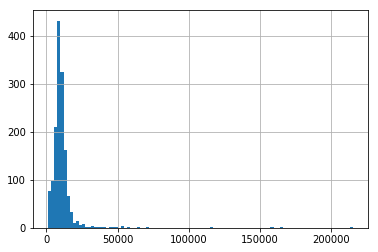

In [246]:
df['LotArea'].hist(bins=100)

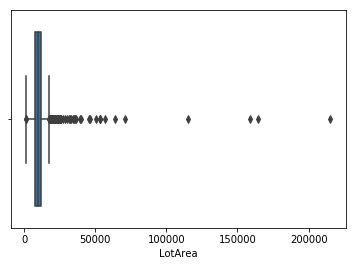

In [247]:
sns.boxplot(x=df['LotArea'])

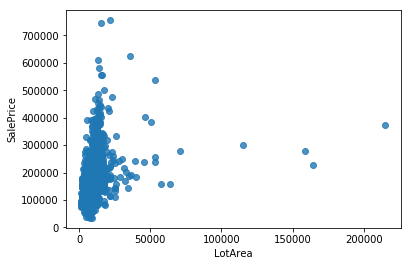

In [248]:
sns.regplot(x=df["LotArea"], y=df["SalePrice"], fit_reg=False);

## Check missing

In [249]:
def check_missing_count(df):
    df_miss =pd.DataFrame(df.isnull().sum()).reset_index()
    df_miss.columns = ['var','NMiss']
    df_miss = df_miss.iloc[1:,:]
    df_miss = df_miss[df_miss['NMiss']>0]
    return df_miss

In [250]:
check_missing_count(df)

,var,NMiss
2,LotFrontage,259
5,Alley,1369
24,MasVnrType,8
25,MasVnrArea,8
29,BsmtQual,37
30,BsmtCond,37
31,BsmtExposure,38
32,BsmtFinType1,37
34,BsmtFinType2,38
41,Electrical,1


In [251]:
df_new = df.fillna(
{
    'LotFrontage': df['LotFrontage'].mean(),
    'Alley':df['Alley'].mode()[0],
    'MasVnrType':df['MasVnrType'].mode()[0],
    'MasVnrArea':df['MasVnrArea'].median(),
    'BsmtQual':df['BsmtQual'].mode()[0],
    'BsmtCond':df['BsmtCond'].mode()[0],
    'BsmtExposure':df['BsmtExposure'].mode()[0],
    'BsmtFinType1':df['BsmtFinType1'].mode()[0],
    'BsmtFinType2':df['BsmtFinType2'].mode()[0],
    'Electrical': df['Electrical'].mode()[0],
    'FireplaceQu': df['FireplaceQu'].mode()[0],
    'GarageType': df['GarageType'].mode()[0],
    'GarageYrBlt':df['GarageYrBlt'].mode()[0],
    'GarageFinish':df['GarageFinish'].mode()[0],
    'GarageQual': df['GarageQual'].mode()[0],
    'GarageCond':df['GarageCond'].mode()[0],
    'PoolQC':df['PoolQC'].mode()[0],
    'Fence':df['Fence'].mode()[0],
    'MiscFeature':df['MiscFeature'].mode()[0]
}
)

In [252]:
check_missing_count(df_new)

,var,NMiss


## Create dummy variables for category variables

In [253]:
def create_dummies(df, var_list):
    res = df.copy()
    for var in var_list:
        dummy = pd.get_dummies(res[var],prefix=var,drop_first=True)
        res = pd.concat([res, dummy],axis=1)
        res = res.drop([var],axis=1)
    return res

In [254]:
df_new.shape

(1460, 80)

In [255]:
list_category_var = []
list_numeric_var = []

In [256]:
for x in df_new.columns[:-1]:
    if type(df_new[x][0]) == str:
        list_category_var.append(x)
    if type(df_new[x][0]) == np.float64 or type(df_new[x][0]) == np.int64:
        list_numeric_var.append(x)

In [257]:
list_change_var= ['MSSubClass', 'OverallQual','OverallCond']

In [258]:
list_category_var = list(set(list_category_var + list_change_var))

In [259]:
list_numeric_var = list(set(list_numeric_var)-set(list_change_var))

In [260]:
df_new_w_dummy = create_dummies(df_new, list_category_var)

In [261]:
df_new_w_dummy.shape

(1460, 274)

In [262]:
check_missing_count(df_new_w_dummy)

,var,NMiss


# Linear regression

### Create target and X variables and split into Train and Test

In [263]:
y = df_new_w_dummy['SalePrice']
X = df_new_w_dummy.drop(['SalePrice'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [264]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1022, 273)
(1022,)
(438, 273)
(438,)


### prepare the same process for dataset without ground truth

In [289]:
X_wo_truth_orig = pd.read_csv('test.csv')

In [290]:
X_wo_truth = X_wo_truth_orig.drop(['Id'],axis=1)

In [291]:
X_wo_truth.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [292]:
check_missing_count(X_wo_truth)

,var,NMiss
1,MSZoning,4
2,LotFrontage,227
5,Alley,1352
8,Utilities,2
22,Exterior1st,1
23,Exterior2nd,1
24,MasVnrType,16
25,MasVnrArea,15
29,BsmtQual,44
30,BsmtCond,45


In [293]:
X_wo_truth_fillna_dict = {
    'MSZoning':df['MSZoning'].mode()[0],
    'LotFrontage': df['LotFrontage'].mean(),
    'Alley':df['Alley'].mode()[0],
    'Utilities':df['Utilities'].mode()[0],
    'Exterior1st':df['Exterior1st'].mode()[0],
    'Exterior2nd':df['Exterior2nd'].mode()[0],
    'MasVnrType':df['MasVnrType'].mode()[0],
    'MasVnrArea':df['MasVnrArea'].median(),
    'BsmtQual':df['BsmtQual'].mode()[0],
    'BsmtCond':df['BsmtCond'].mode()[0],
    'BsmtExposure':df['BsmtExposure'].mode()[0],
    'BsmtFinType1':df['BsmtFinType1'].mode()[0],
    'BsmtFinSF1':int(df['BsmtFinSF1'].median()),
    'BsmtFinType2':df['BsmtFinType2'].mode()[0],
    'BsmtFinSF2':int(df['BsmtFinSF2'].median()),
    'BsmtUnfSF':int(df['BsmtUnfSF'].median()),
    'TotalBsmtSF':int(df['TotalBsmtSF'].median()),
    'BsmtFullBath':df['BsmtFullBath'].mode()[0],
    'BsmtHalfBath':df['BsmtHalfBath'].mode()[0],
    'KitchenQual':df['KitchenQual'].mode()[0],
    'Functional':df['Functional'].mode()[0],
    'FireplaceQu': df['FireplaceQu'].mode()[0],
    'GarageType': df['GarageType'].mode()[0],
    'GarageYrBlt':df['GarageYrBlt'].mode()[0],
    'GarageFinish':df['GarageFinish'].mode()[0],
    'GarageCars':df['GarageCars'].mode()[0],
    'GarageArea':int(df['GarageArea'].median()),
    'GarageQual': df['GarageQual'].mode()[0],
    'GarageCond':df['GarageCond'].mode()[0],
    'PoolQC':df['PoolQC'].mode()[0],
    'Fence':df['Fence'].mode()[0],
    'MiscFeature':df['MiscFeature'].mode()[0],
    'SaleType':df['SaleType'].mode()[0]
}

In [294]:
X_wo_truth_new = X_wo_truth.fillna(X_wo_truth_fillna_dict)

In [295]:
check_missing_count(X_wo_truth_new)

,var,NMiss


In [296]:
X_wo_truth_new_w_dummy = create_dummies(X_wo_truth_new, list_category_var)

In [297]:
X_wo_truth_new_w_dummy.shape

(1459, 256)

In [298]:
for x in x_train.columns:
    if x not in X_wo_truth_new_w_dummy.columns:
        X_wo_truth_new_w_dummy[x] = 0

In [299]:
for x in X_wo_truth_new_w_dummy.columns:
    if x not in x_train.columns:
        print(x)

MSSubClass_150


In [300]:
X_wo_truth_new_w_dummy =X_wo_truth_new_w_dummy.drop(['MSSubClass_150'],axis=1)

In [301]:
X_wo_truth_new_w_dummy.shape

(1459, 273)

## Linear Regression

In [302]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### submission

In [404]:
X_wo_truth_new_preds = linear_reg.predict(X_wo_truth_new_w_dummy[x_train.columns])  

In [405]:
len(X_wo_truth_new_preds)

1459

In [406]:
data ={
    'Id': list(X_wo_truth_orig['Id']),
    'SalePrice': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)
submission.to_csv('20210227_submission_1_Linear_Regression.csv')

### Random Forrest

In [344]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [345]:
def create_feature_importance(model, x, top_n=20):
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:top_n]]
    
    ls1 = [x[0] for x in feature_importances]
    ls2 = [x[1] for x in feature_importances]
    ls1 = ls1[:top_n]
    ls2 = ls2[:top_n]
    ls1.reverse()
    ls2.reverse()
    
    plt.barh(ls1, ls2)

Variable: GarageCars           Importance: 0.27
Variable: GrLivArea            Importance: 0.25
Variable: YearBuilt            Importance: 0.05
Variable: TotalBsmtSF          Importance: 0.05
Variable: 1stFlrSF             Importance: 0.04
Variable: ExterQual_TA         Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.03
Variable: GarageArea           Importance: 0.03
Variable: LotArea              Importance: 0.02
Variable: YearRemodAdd         Importance: 0.02
Variable: MasVnrArea           Importance: 0.02
Variable: LotFrontage          Importance: 0.01
Variable: BsmtUnfSF            Importance: 0.01
Variable: 2ndFlrSF             Importance: 0.01
Variable: FullBath             Importance: 0.01
Variable: OpenPorchSF          Importance: 0.01
Variable: KitchenQual_TA       Importance: 0.01
Variable: CentralAir_Y         Importance: 0.01
Variable: GarageFinish_Unf     Importance: 0.01
Variable: OverallQual_8        Importance: 0.01


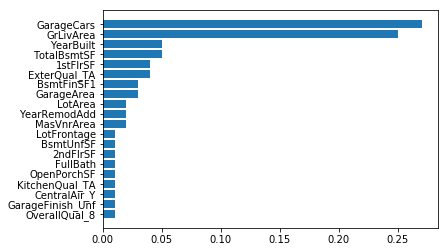

In [346]:
create_feature_importance(rf, x_train)

In [347]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## R2

In [348]:
rf.score(x_train,y_train)

0.978532955362126

In [349]:
rf.score(x_test,y_test)

0.8546929124914135

### Random Search

In [350]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [351]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [352]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

### Get the best model

In [353]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [354]:
rf_random_best = rf_random.best_estimator_

Variable: GrLivArea            Importance: 0.07
Variable: TotalBsmtSF          Importance: 0.06
Variable: 1stFlrSF             Importance: 0.05
Variable: GarageCars           Importance: 0.05
Variable: GarageArea           Importance: 0.05
Variable: YearBuilt            Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.03
Variable: 2ndFlrSF             Importance: 0.03
Variable: FullBath             Importance: 0.03
Variable: Fireplaces           Importance: 0.03
Variable: ExterQual_TA         Importance: 0.03
Variable: LotArea              Importance: 0.02
Variable: YearRemodAdd         Importance: 0.02
Variable: MasVnrArea           Importance: 0.02
Variable: TotRmsAbvGrd         Importance: 0.02
Variable: GarageYrBlt          Importance: 0.02
Variable: KitchenQual_TA       Importance: 0.02
Variable: GarageFinish_Unf     Importance: 0.02
Variable: Foundation_PConc     Importance: 0.02
Variable: OverallQual_8        Importance: 0.02


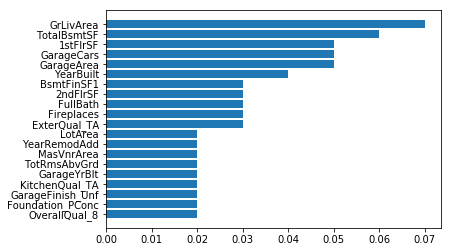

In [355]:
create_feature_importance(rf_random_best, x_train)

### R2

In [356]:
rf_random_best.score(x_train,y_train)

0.9999999876984111

In [357]:
rf_random_best.score(x_test,y_test)

0.8594126114763454

### Submissoin

In [403]:
X_wo_truth_new_preds = rf_random_best.predict(X_wo_truth_new_w_dummy[x_train.columns])  
data ={
    'Id': list(X_wo_truth_orig['Id']),
    'SalePrice': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)
submission.to_csv('20210227_submission_2_Random_Forest_Random_Search.csv')

## Grid Seach

In [371]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [1, 3, 5, 9],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [1, 3, 5, 9], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [372]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [373]:
rf_grid_best = rf_grid.best_estimator_

Variable: GrLivArea            Importance: 0.08
Variable: GarageCars           Importance: 0.07
Variable: TotalBsmtSF          Importance: 0.05
Variable: 1stFlrSF             Importance: 0.05
Variable: GarageArea           Importance: 0.05
Variable: YearBuilt            Importance: 0.04
Variable: ExterQual_TA         Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.03
Variable: 2ndFlrSF             Importance: 0.03
Variable: FullBath             Importance: 0.03
Variable: KitchenQual_TA       Importance: 0.03
Variable: LotArea              Importance: 0.02
Variable: YearRemodAdd         Importance: 0.02
Variable: MasVnrArea           Importance: 0.02
Variable: TotRmsAbvGrd         Importance: 0.02
Variable: Fireplaces           Importance: 0.02
Variable: GarageYrBlt          Importance: 0.02
Variable: GarageFinish_Unf     Importance: 0.02
Variable: ExterQual_Gd         Importance: 0.02
Variable: BsmtQual_TA          Importance: 0.02


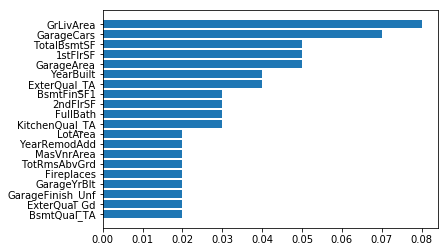

In [374]:
create_feature_importance(rf_grid_best, x_train)

In [375]:
rf_grid_best.score(x_train,y_train)

0.9739549419341077

In [376]:
rf_grid_best.score(x_test,y_test)

0.8448219912314656

In [402]:
X_wo_truth_new_preds = rf_grid_best.predict(X_wo_truth_new_w_dummy[x_train.columns])  
data ={
    'Id': list(X_wo_truth_orig['Id']),
    'SalePrice': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)
submission.to_csv('20210227_submission_3_Random_Forest_Grid_Search.csv')

# XGBoost

In [385]:
from sklearn import cross_validation, metrics
def modelfit(alg, x_train, y_train, x_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        print(xgb_param)
        xgtrain = xgb.DMatrix(x_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x_train, y_train, eval_metric='rmse')
                
    #Print model report:
    print ("\nModel Report")
    print ("RMSE (Train) : %.4g" % np.sqrt(MSE(y_train, alg.predict(x_train))))
    print ("R2 (Train): %f" % alg.score(x_train,y_train))
    print ("RMSE : %.4g" % np.sqrt(MSE(y_test, alg.predict(x_test))))
    print ("R2 (Test): %f" % alg.score(x_test,y_test))
    
    create_feature_importance(alg,x_train)                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Model Report
RMSE (Train) : 1168
R2 (Train): 0.999776
RMSE : 3.545e+04
R2 (Test): 0.814900
Variable: GarageCars           Importance: 0.30000001192092896
Variable: CentralAir_Y         Importance: 0.1599999964237213
Variable: ExterQual_TA         Importance: 0.09000000357627869
Variable: GrLivArea            Importance: 0.07000000029802322
Variable: MSSubClass_60        Importance: 0.03999999910593033
Variable: BsmtQual_TA          Importanc

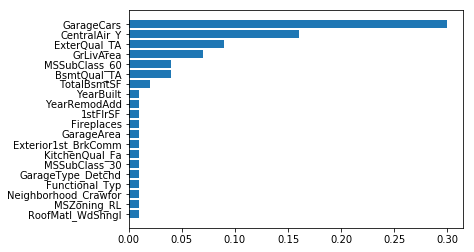

In [386]:
xgb1 = xgb.sklearn.XGBRegressor()
modelfit(xgb1, x_train, y_train, x_test, y_test)

## Grid Search

In [388]:
param_test = {
 'learning_rate':[0.001,0.01,0.1],
  'n_estimators':[200,400],
 'max_depth':[4,5,6],
 'min_child_weight': [1],
 'reg_alpha':[0,0.001],
 'reg_lambda':[0,0.001],
 'gamma':[0,1],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective':['reg:squarederror']
}
xgb_grid = GridSearchCV(estimator = xgb.sklearn.XGBRegressor(), param_grid = param_test,n_jobs=4,iid=False, cv=5,verbose=2)
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [200, 400], 'max_depth': [4, 5, 6], 'min_child_weight': [1], 'reg_alpha': [0, 0.001], 'reg_lambda': [0, 0.001], 'gamma': [0, 1], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['reg:squarederror']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [389]:
xgb_grid.best_params_, 

({'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 200,
  'objective': 'reg:squarederror',
  'reg_alpha': 0,
  'reg_lambda': 0,
  'subsample': 0.8},)

In [390]:
xgb_grid.best_score_

0.8542001374972413

In [391]:
xgb_grid_best = xgb_grid.best_estimator_

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Model Report
RMSE (Train) : 5830
R2 (Train): 0.994427
RMSE : 3.275e+04
R2 (Test): 0.842019
Variable: GarageCars           Importance: 0.23000000417232513
Variable: ExterQual_TA         Importance: 0.14000000059604645
Variable: BsmtQual_TA          Importance: 0.10999999940395355
Variable: GrLivArea            Importance: 0.03999999910593033
Variable: GarageFinish_Unf     Importance: 0.03999999910593033
Variable: OverallQual_8        Importance: 0.03999999910593033
Variable: Kitche

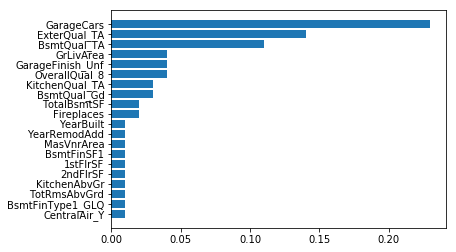

In [392]:
modelfit(xgb_grid_best, x_train, y_train, x_test, y_test)

In [393]:
xgb_grid_best.score(x_train,y_train)

0.994426939601244

In [394]:
xgb_grid_best.score(x_test,y_test)

0.8420190370264433

In [401]:
X_wo_truth_new_preds = xgb_grid_best.predict(X_wo_truth_new_w_dummy[x_train.columns])  
data ={
    'Id': list(X_wo_truth_orig['Id']),
    'SalePrice': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)
submission.to_csv('20210227_submission_4_XGBoost_Grid_Search.csv')

### Random Search

In [410]:
param_test = {
 'learning_rate':[0.0001, 0.0005, 0.001,0.01,0.1,0.2],
  'n_estimators':[400,500,600,700,800,900,1000,1500],
 'max_depth':[4,5,6,7,8,9,10],
 'min_child_weight': [1],
 'reg_alpha':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'reg_lambda':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'gamma':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective':['reg:squarederror']
}
xgb_random = RandomizedSearchCV(estimator = xgb.sklearn.XGBRegressor(), param_distributions = param_test, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'learning_rate': [0.0001, 0.0005, 0.001, 0.01, 0.1, 0.2], 'n_estimators': [400, 500, 600, 700, 800, 900, 1000, 1500], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1], 'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['reg:squarederror']},
          pre_dispatch='2*n_jobs', 

In [411]:
xgb_random.grid_scores_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85172, std: 0.03090, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.8},
 mean: 0.83597, std: 0.05626, params: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 10, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: -4.47262, std: 0.35108, params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'objective': 'reg:squarederror', 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.0001, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: 0.83400, std: 0.02691, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.001, 'objective': 'reg:squarederror', 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8},
 mean: 0

In [412]:
xgb_random.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.1,
 'reg_lambda': 0.001,
 'subsample': 0.8}

In [413]:
xgb_random.best_score_

0.8571264556075862

In [414]:
xgb_random_best = xgb_random.best_estimator_

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.001, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Model Report
RMSE (Train) : 3696
R2 (Train): 0.997760
RMSE : 3.259e+04
R2 (Test): 0.843507
Variable: GarageCars           Importance: 0.27000001072883606
Variable: ExterQual_TA         Importance: 0.10999999940395355
Variable: GrLivArea            Importance: 0.03999999910593033
Variable: KitchenQual_TA       Importance: 0.03999999910593033
Variable: BsmtQual_TA          Importance: 0.03999999910593033
Variable: GarageFinish_Unf     Importance: 0.029999999329447746
Variable

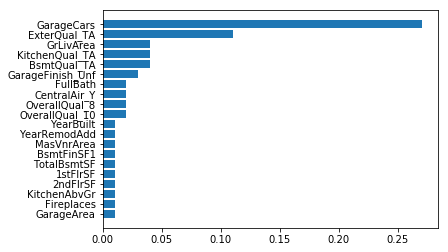

In [415]:
modelfit(xgb_random_best, x_train, y_train, x_test, y_test)

In [416]:
xgb_random_best.score(x_train,y_train)

0.9977604402722758

In [417]:
xgb_random_best.score(x_test,y_test)

0.8435070319392971

In [418]:
X_wo_truth_new_preds = xgb_random_best.predict(X_wo_truth_new_w_dummy[x_train.columns])  
data ={
    'Id': list(X_wo_truth_orig['Id']),
    'SalePrice': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)
submission.to_csv('20210227_submission_5_XGBoost_Random_Search.csv')